# IPL 2022 Analysis

In [5]:
import pandas as pd

# Load the datasets
ipl_data_2022 = pd.read_csv("/content/ipl_2022_deliveries.csv")

# Display basic info
ipl_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 0 to 17911
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17912 non-null  int64  
 1   season            17912 non-null  int64  
 2   match_no          17912 non-null  int64  
 3   date              17912 non-null  object 
 4   venue             17912 non-null  object 
 5   batting_team      17912 non-null  object 
 6   bowling_team      17912 non-null  object 
 7   innings           17912 non-null  int64  
 8   over              17912 non-null  float64
 9   striker           17912 non-null  object 
 10  bowler            17912 non-null  object 
 11  runs_of_bat       17912 non-null  int64  
 12  extras            17912 non-null  int64  
 13  wide              17912 non-null  int64  
 14  legbyes           17912 non-null  int64  
 15  byes              17912 non-null  int64  
 16  noballs           17912 non-null  int64 

## Data Analysis for IPL 2022, 2023, and 2024

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import os

In [7]:
ipl_data_2022 = pd.read_csv('/content/ipl_2022_deliveries.csv')
ipl_data_2022.head()

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,1,0,0,0,1,NaN,NaN,NaN
1,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.1,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
2,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,1,1,0,0,0,NaN,NaN,NaN
3,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.2,Gaikwad,Umesh Yadav,0,0,0,0,0,0,NaN,NaN,NaN
4,202201,2022,1,"Mar 26, 2022","Wankhede Stadium, Mumbai",CSK,KKR,1,0.3,Gaikwad,Umesh Yadav,0,0,0,0,0,0,caught,Gaikwad,Nitish Rana


In [8]:
ipl_data_2022['total_runs'] = ipl_data_2022['runs_of_bat'] + ipl_data_2022['extras']

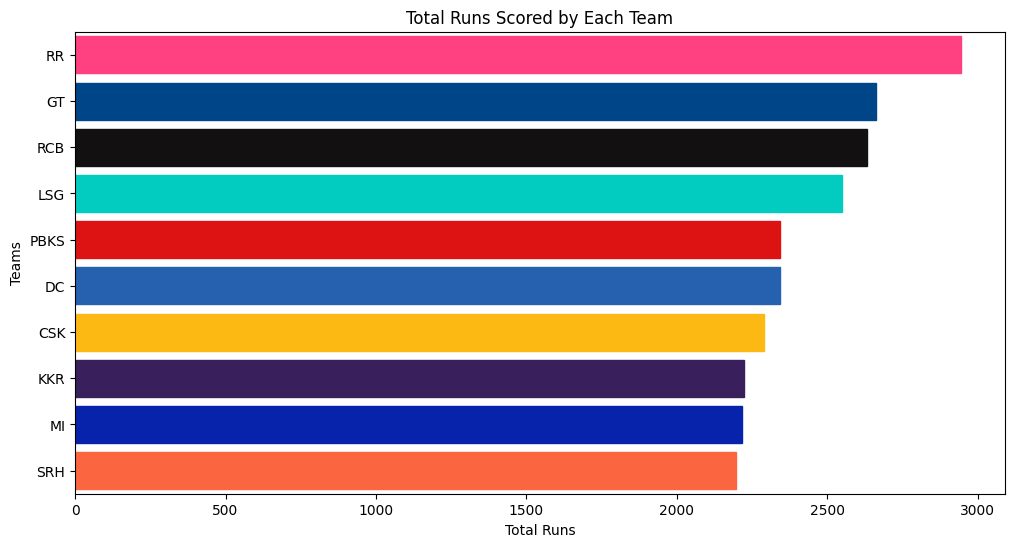

In [9]:
team_runs = ipl_data_2022.groupby('batting_team')['total_runs'].sum().reset_index()

team_runs = team_runs.sort_values(by='total_runs', ascending=False)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='total_runs', y='batting_team', data=team_runs)

def teamclr(bars,criterion):
    for bar, team in zip(bars.patches, criterion):
        if team == 'SRH':
            bar.set_color('#fb653f')
        elif team == 'RCB':
            bar.set_color('#121010')
        elif team == 'CSK':
            bar.set_color('#fdb913')
        elif team == 'MI':
            bar.set_color('#0722ab')
        elif team == 'KKR':
            bar.set_color('#391F5C')
        elif team == 'PBKS':
            bar.set_color('#dd1212')
        elif team == 'RR':
            bar.set_color('#FF4081')
        elif team == 'GT':
            bar.set_color('#004587')
        elif team == 'LSG':
            bar.set_color('#02ccbf')
        elif team == 'DC':
            bar.set_color('#2561AE')

teamclr(bars,team_runs['batting_team'])
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.show()

<ipython-input-10-b72dc2a0c2fa>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='batting_team', y='average_batting_runs_per_innings', data=team_batting_avg_runs, palette='viridis')


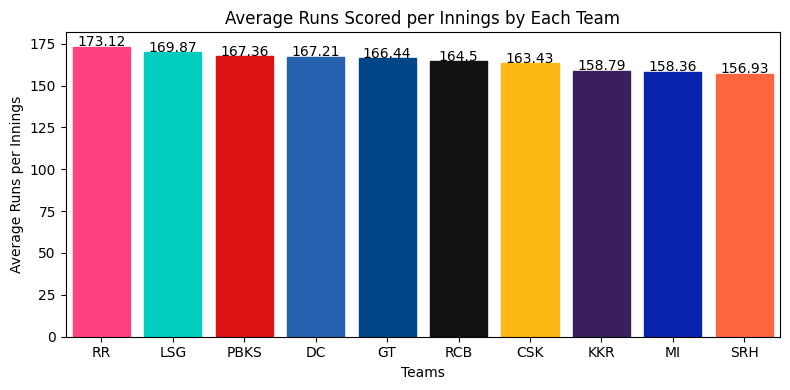

In [10]:
team_match_runs = ipl_data_2022.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Calculate the number of innings for each team
innings_counts = team_match_runs['batting_team'].value_counts().to_frame(name='innings').reset_index()
innings_counts.columns = ['batting_team', 'innings']

# Calculate total runs for each team
total_batting_team_runs = team_match_runs.groupby('batting_team')['total_runs'].sum().reset_index()

# Merge total runs and innings counts
team_batting_avg_runs = pd.merge(total_batting_team_runs, innings_counts, on='batting_team')

# Calculate average runs per innings
team_batting_avg_runs['average_batting_runs_per_innings'] = team_batting_avg_runs['total_runs'] / team_batting_avg_runs['innings']

# Sort by average runs per innings
team_batting_avg_runs = team_batting_avg_runs.sort_values(by='average_batting_runs_per_innings', ascending=False)

plt.figure(figsize=(8, 4))  # Adjusting figure size
bars = sns.barplot(x='batting_team', y='average_batting_runs_per_innings', data=team_batting_avg_runs, palette='viridis')
teamclr(bars, team_batting_avg_runs['batting_team'])

# Adding values on top of the bars
for bar, value in zip(bars.patches, team_batting_avg_runs['average_batting_runs_per_innings']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, round(value, 2),
              ha='center', color='black', fontsize=10)

teamclr(bars,team_batting_avg_runs['average_batting_runs_per_innings'])
plt.title('Average Runs Scored per Innings by Each Team')
plt.xlabel('Teams')
plt.ylabel('Average Runs per Innings')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()

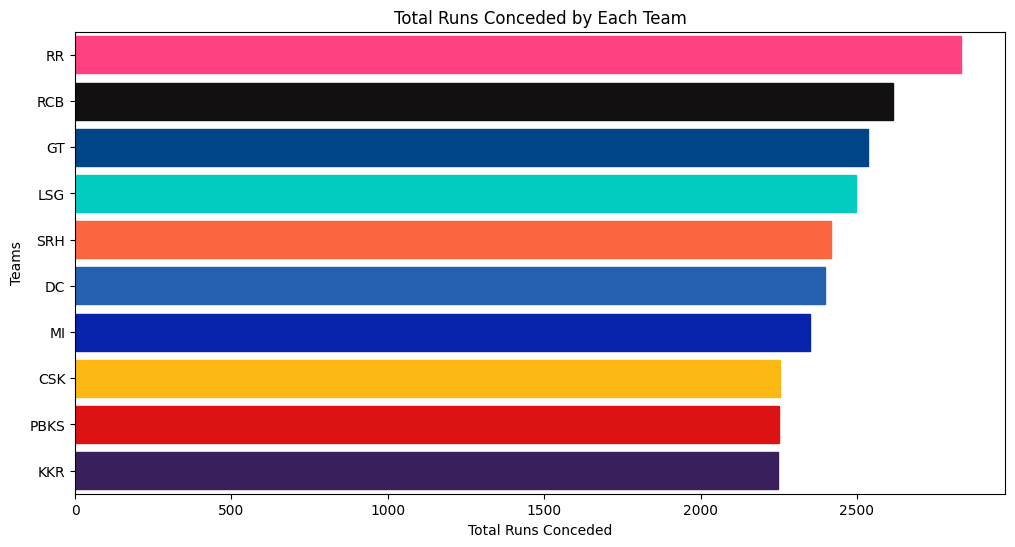

In [11]:
team_runs_conceded = ipl_data_2022.groupby('bowling_team')['total_runs'].sum().reset_index()

team_runs_conceded = team_runs_conceded.sort_values(by='total_runs', ascending=False)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='total_runs', y='bowling_team', data=team_runs_conceded)

teamclr(bars,team_runs_conceded['bowling_team'])
plt.title('Total Runs Conceded by Each Team')
plt.xlabel('Total Runs Conceded')
plt.ylabel('Teams')
plt.show()

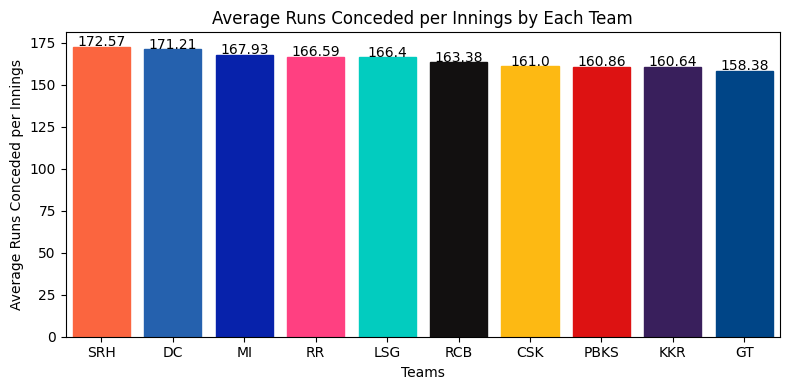

In [12]:
team_runs_conceded = ipl_data_2022.groupby(['match_id', 'bowling_team'])['total_runs'].sum().reset_index()

# Calculate the number of innings for each team
innings_counts1 = team_runs_conceded['bowling_team'].value_counts().to_frame(name='innings').reset_index()
innings_counts1.columns = ['bowling_team', 'innings']

# Calculate total runs for each team
total_team_runs_conceded = team_runs_conceded.groupby('bowling_team')['total_runs'].sum().reset_index()

# Merge total runs and innings counts
team_avg_runs_conceded = pd.merge(total_team_runs_conceded, innings_counts1, on='bowling_team')

# Calculate average runs per innings
team_avg_runs_conceded['average_runs_conceded_per_innings'] = team_avg_runs_conceded['total_runs'] / team_avg_runs_conceded['innings']

# Sort by average runs per innings
team_avg_runs_conceded = team_avg_runs_conceded.sort_values(by='average_runs_conceded_per_innings', ascending=False)

plt.figure(figsize=(8, 4))  # Adjusting figure size
bars = sns.barplot(x='bowling_team', y='average_runs_conceded_per_innings', data=team_avg_runs_conceded)
teamclr(bars, team_avg_runs_conceded['bowling_team'])

# Adding values on top of the bars
for bar, value in zip(bars.patches, team_avg_runs_conceded['average_runs_conceded_per_innings']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, round(value, 2),
              ha='center', color='black', fontsize=10)

teamclr(bars,team_avg_runs_conceded['average_runs_conceded_per_innings'])
plt.title('Average Runs Conceded per Innings by Each Team')
plt.xlabel('Teams')
plt.ylabel('Average Runs Conceded per Innings')
plt.xticks(rotation=0)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()

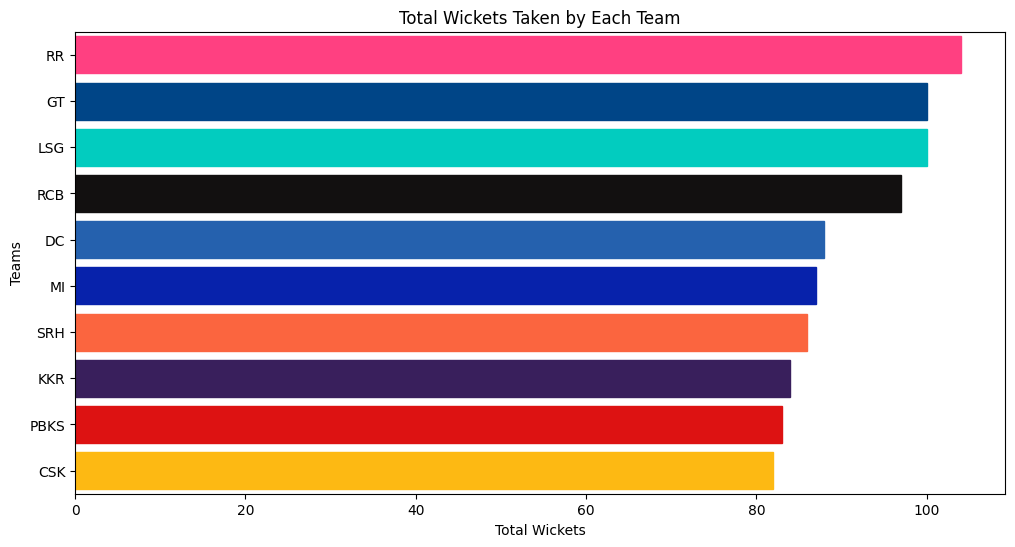

In [13]:
# Filter only wicket deliveries
wickets = ipl_data_2022[ipl_data_2022['wicket_type'].notnull()]

# Group by 'bowling_team' and count the 'dismissal_kind'
team_wickets = wickets.groupby('bowling_team')['wicket_type'].count().reset_index()

# Sort by wickets
team_wickets = team_wickets.sort_values(by='wicket_type', ascending=False)

# Plotting the total wickets taken by each team
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='wicket_type', y='bowling_team', data=team_wickets)
teamclr(bars,team_wickets['bowling_team'])
plt.title('Total Wickets Taken by Each Team')
plt.xlabel('Total Wickets')
plt.ylabel('Teams')
plt.show()

In [14]:
import math
ipl_data_2022['over_'] = ipl_data_2022['over'].map(lambda x: math.ceil(x))

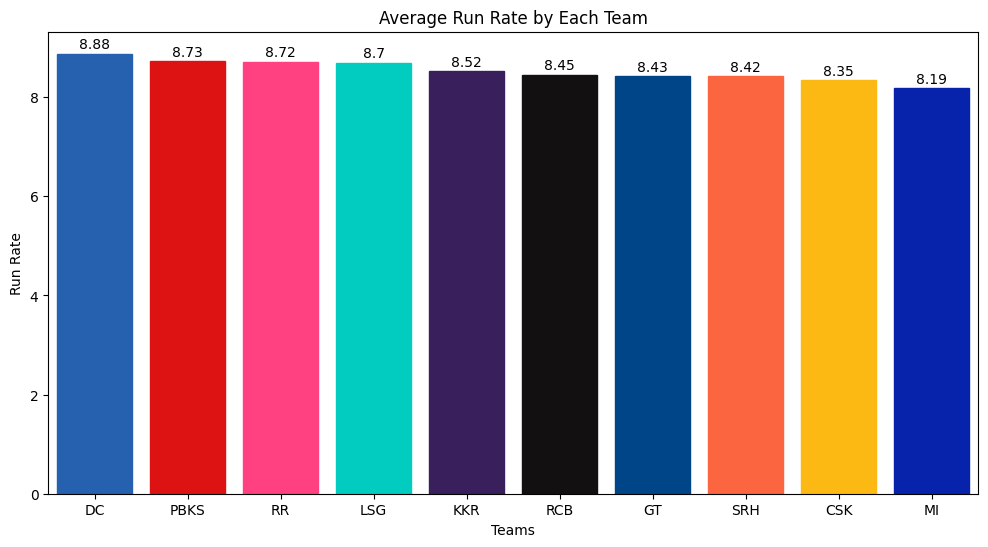

In [15]:
# Filter out wide and no-ball deliveries
legal_deliveries = ipl_data_2022[(ipl_data_2022['noballs'] == 0) & (ipl_data_2022['wide'] == 0)]

# Count the number of legal deliveries faced by each team
balls_faced = legal_deliveries.groupby('batting_team').size().reset_index(name='balls_faced')

# Calculate total runs scored by each team
total_runs = ipl_data_2022.groupby('batting_team')['total_runs'].sum().reset_index()

# Merge the two dataframes on batting_team
team_stats = pd.merge(balls_faced, total_runs, on='batting_team')

# Calculate overs faced
team_stats['overs_faced'] = team_stats['balls_faced'] / 6

# Calculate run rate
team_stats['run_rate'] = team_stats['total_runs'] / team_stats['overs_faced']

# Sort by run rate
team_stats = team_stats.sort_values(by='run_rate', ascending=False)
# Plotting the average run rate for each team
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='batting_team', y='run_rate', data=team_stats)
teamclr(bars, team_stats['batting_team'])
for bar, value in zip(bars.patches, team_stats['run_rate']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(value, 2),
              ha='center', color='black', fontsize=10)

plt.title('Average Run Rate by Each Team')
plt.xlabel('Teams')
plt.ylabel('Run Rate')
plt.show()

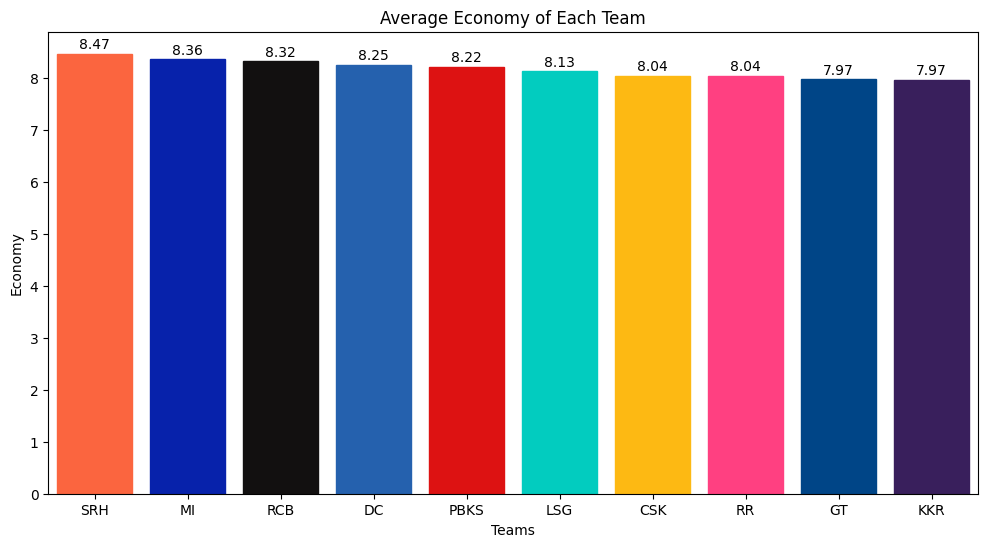

In [16]:
# Count the number of deliveries bowled by each team
balls_bowled = ipl_data_2022.groupby('bowling_team').size().reset_index(name='balls_bowled')

# Calculate total runs conceded by each team
total_runs = ipl_data_2022.groupby('bowling_team')['total_runs'].sum().reset_index()

# Merge the two dataframes on batting_team
team_stats = pd.merge(balls_bowled, total_runs, on='bowling_team')

# Calculate overs faced
team_stats['overs_bowled'] = team_stats['balls_bowled'] / 6

# Calculate run rate
team_stats['economy'] = team_stats['total_runs'] / team_stats['overs_bowled']

# Sort by run rate
team_stats = team_stats.sort_values(by='economy', ascending=False)
# Plotting the average run rate for each team
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='bowling_team', y='economy', data=team_stats)
teamclr(bars, team_stats['bowling_team'])
for bar, value in zip(bars.patches, team_stats['economy']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, round(value, 2),
              ha='center', color='black', fontsize=10)

plt.title('Average Economy of Each Team')
plt.xlabel('Teams')
plt.ylabel('Economy')
plt.show()

In [17]:
top_run_scorer = ipl_data_2022.groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer['Avg'] = round(top_run_scorer['Runs'] / top_run_scorer['Inns'], 2)
top_run_scorer.index += 1
top_run_scorer[:20]

,striker,Team,Inns,Runs,SR,Avg
1,Buttler,RR,17,863,144.80,50.76
2,Rahul,LSG,14,616,130.51,44.00
3,de Kock,LSG,15,508,145.14,33.87
4,Hardik Pandya,GT,15,487,125.84,32.47
5,Shubman Gill,GT,16,483,129.14,30.19
6,Miller,GT,16,481,138.22,30.06
7,du Plessis,RCB,16,468,124.14,29.25
8,Dhawan,PBKS,14,460,116.46,32.86
9,Samson,RR,17,458,142.68,26.94
10,Hooda,LSG,14,451,132.65,32.21


<ipython-input-18-5475ef6adaf3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='strike_rate', y='striker', data=top_strike_rate_batsmen, palette='Spectral')


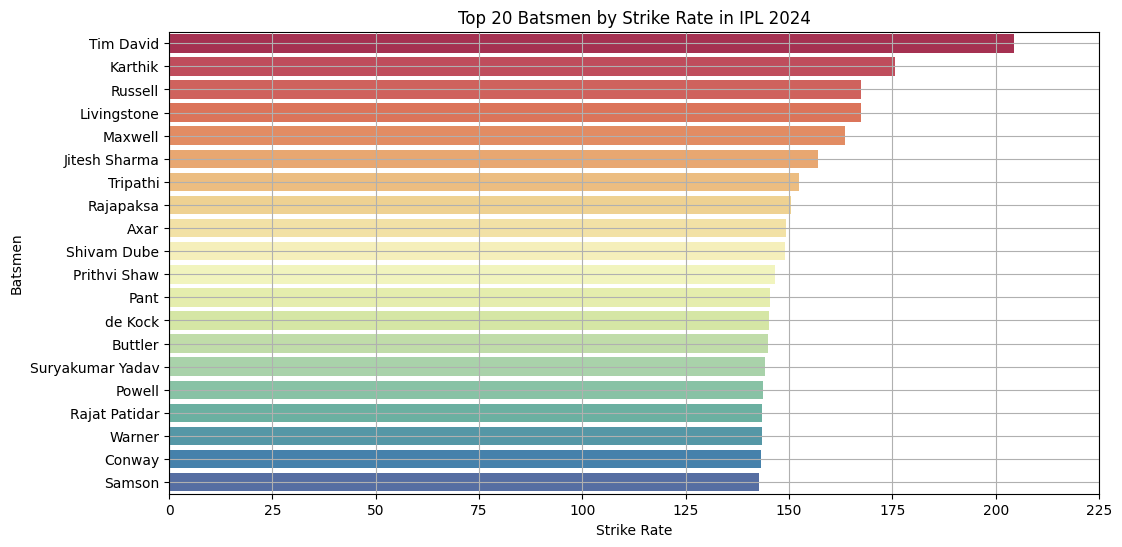

In [18]:
batsman_runs = ipl_data_2022.groupby('striker')['runs_of_bat'].sum().reset_index()

# Calculate balls faced by each batsman
balls_faced = ipl_data_2022.groupby('striker')['match_id'].count().reset_index()
balls_faced.columns = ['striker', 'balls_faced']

# Merge batsman runs and balls faced
batsman_strike_rate = pd.merge(batsman_runs, balls_faced, on='striker')

# Calculate strike rate
batsman_strike_rate['strike_rate'] = round((batsman_strike_rate['runs_of_bat'] / batsman_strike_rate['balls_faced']) * 100,2)

# Sort by strike rate and take top 20
top_strike_rate_batsmen = batsman_strike_rate[batsman_strike_rate['runs_of_bat'] > 100].sort_values(by='strike_rate', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='strike_rate', y='striker', data=top_strike_rate_batsmen, palette='Spectral')
plt.xticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225])  # Set custom tick marks
plt.grid()
plt.title('Top 20 Batsmen by Strike Rate in IPL 2024')
plt.xlabel('Strike Rate')
plt.ylabel('Batsmen')
plt.show()

In [19]:
top_striker = ipl_data_2022.groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_striker = top_striker[top_striker['Runs'] > 100].reset_index()
top_striker.index += 1
top_striker[:20]

,striker,Team,Inns,Runs,SR
1,Tim David,MI,8,186,204.40
2,Karthik,RCB,16,330,175.53
3,Russell,KKR,12,335,167.50
4,Livingstone,PBKS,14,437,167.43
5,Maxwell,RCB,13,301,163.59
6,Jitesh Sharma,PBKS,10,234,157.05
7,Tripathi,SRH,14,413,152.40
8,Rajapaksa,PBKS,9,206,150.36
9,Axar,DC,10,182,149.18
10,Shivam Dube,CSK,11,289,148.97


In [20]:
top_wicket_takers = ipl_data_2022.loc[(~ipl_data_2022['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2022['byes'] == 0) & (ipl_data_2022['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers.index += 1
top_wicket_takers.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Chahal,RR,17,27,7.564593
2,Hasaranga,RCB,16,26,7.610619
3,Rabada,PBKS,13,23,8.174497
4,Umran Malik,SRH,14,22,8.841060
5,Kuldeep Yadav,DC,14,21,8.242623
6,Shami,GT,16,20,7.812834
7,Hazlewood,RCB,12,20,7.936842
8,Rashid Khan,GT,16,19,6.614173
9,Harshal Patel,RCB,15,19,7.458967
10,Prasidh,RR,17,19,7.801418


In [21]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2022.groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2022.loc[(ipl_data_2022['byes'] == 0) & (ipl_data_2022['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[~ipl_data_2022['wicket_type'].isin(['runout','retired out','retired hurt'])].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
60,Narine,342,57.000000,312,5.473684,9,38.000000
56,Mohsin Khan,206,34.333333,197,5.737864,14,14.714286
55,Moeen Ali,146,24.333333,158,6.493151,8,18.250000
72,Rashid Khan,386,64.333333,421,6.544041,19,20.315789
101,Willey,66,11.000000,72,6.545455,1,66.000000
52,Maxwell,146,24.333333,165,6.780822,6,24.333333
80,Santner,114,19.000000,130,6.842105,4,28.500000
96,Umesh Yadav,297,49.500000,339,6.848485,16,18.562500
41,Krunal Pandya,232,38.666667,265,6.853448,10,23.200000
11,Bhuvneshwar,330,55.000000,383,6.963636,12,27.500000


<ipython-input-22-f0f79b935860>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='average', y='batting_team', data=merged_data1, palette='plasma')


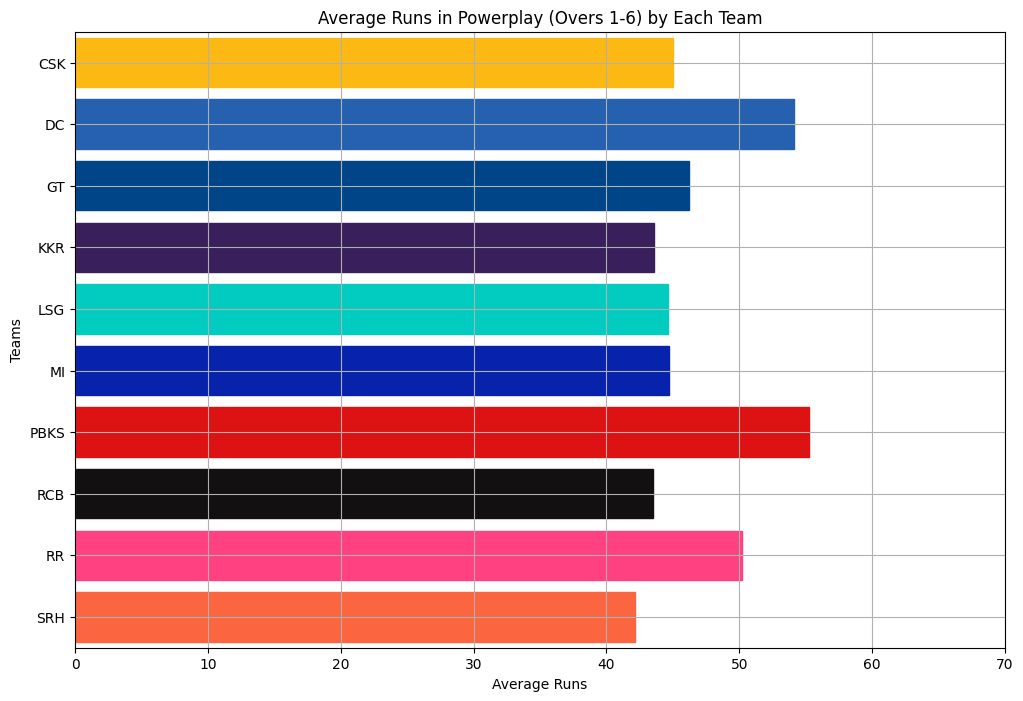

In [22]:
# Filter data for powerplay overs (1-6)
powerplay_data = ipl_data_2022[ipl_data_2022['over'] <= 6]

# Group by 'batting_team' and sum the 'total_runs'
powerplay_runs = powerplay_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data1 = pd.merge(powerplay_runs, innings_counts, on='batting_team')

merged_data1['average'] = merged_data1['total_runs'] / merged_data1['innings']
# Plotting the total runs scored by each team in powerplay
plt.figure(figsize=(12, 8))
bars = sns.barplot(x='average', y='batting_team', data=merged_data1, palette='plasma')
teamclr(bars, merged_data1['batting_team'])
plt.title('Average Runs in Powerplay (Overs 1-6) by Each Team')
plt.xticks([i for i in range(0,80,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.grid()
plt.show()

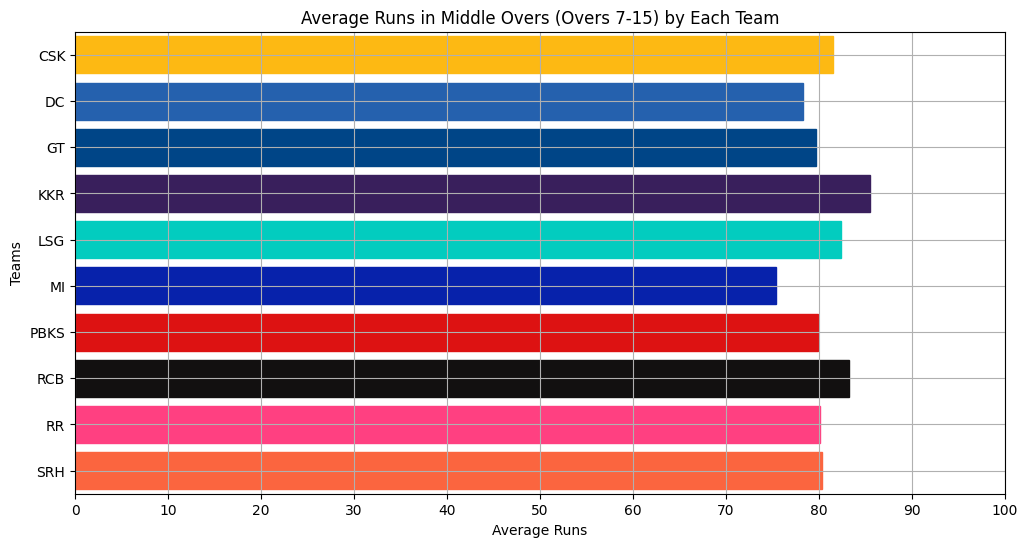

In [23]:
# Filter data for middle overs (7-15)
middle_overs_data = ipl_data_2022[(ipl_data_2022['over'] > 6) & (ipl_data_2022['over'] <= 16)]

# Group by 'batting_team' and sum the 'total_runs'
middle_overs_runs = middle_overs_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data2 = pd.merge(middle_overs_runs, innings_counts, on='batting_team')

merged_data2['average'] = merged_data2['total_runs'] / merged_data2['innings']# Plotting the total runs scored by each team in middle overs

plt.figure(figsize=(12, 6))
bars = sns.barplot(x='average', y='batting_team', data=merged_data2)
teamclr(bars, merged_data2['batting_team'])
plt.title('Average Runs in Middle Overs (Overs 7-15) by Each Team')
plt.xticks([i for i in range(0,110,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.grid()
plt.show()

<ipython-input-24-46e14f3b45ae>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='average', y='batting_team', data=merged_data3, palette='coolwarm')


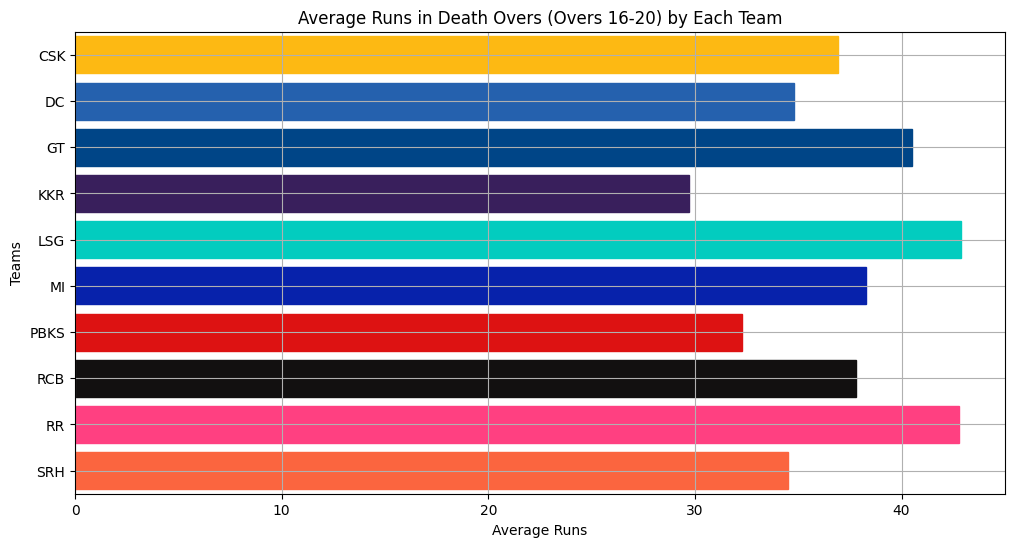

In [24]:
# Filter data for death overs (16-20)
death_overs_data = ipl_data_2022[ipl_data_2022['over'] >= 16]

# Group by 'batting_team' and sum the 'total_runs'
death_overs_runs = death_overs_data.groupby('batting_team')['total_runs'].sum().reset_index()

merged_data3 = pd.merge(death_overs_runs, innings_counts, on='batting_team')

merged_data3['average'] = merged_data3['total_runs'] / merged_data3['innings']

# Plotting the total runs scored by each team in death overs
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='average', y='batting_team', data=merged_data3, palette='coolwarm')
teamclr(bars, merged_data3['batting_team'])
plt.title('Average Runs in Death Overs (Overs 16-20) by Each Team')
plt.xticks([i for i in range(0,50,10)])
plt.xlabel('Average Runs')
plt.ylabel('Teams')
plt.grid()
plt.show()

In [25]:
top_run_scorer_powerplay = ipl_data_2022[ipl_data_2022['over'] < 6].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer_powerplay.index += 1
top_run_scorer_powerplay[:20]

,striker,Team,Inns,Runs,SR
1,Buttler,RR,17,374,129.86
2,de Kock,LSG,15,257,133.16
3,Abhishek Sharma,SRH,14,255,122.60
4,Dhawan,PBKS,14,242,112.04
5,Rohit,MI,14,227,118.23
6,Warner,DC,12,225,144.23
7,Ishan Kishan,MI,14,225,109.22
8,Prithvi Shaw,DC,10,217,145.64
9,W Saha,GT,11,217,130.72
10,Shubman Gill,GT,16,215,114.36


In [26]:
top_sr_powerplay = ipl_data_2022[ipl_data_2022['over'] < 6].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_sr_powerplay = top_sr_powerplay[top_sr_powerplay['Runs'] > 50].reset_index()
top_sr_powerplay.index += 1
top_sr_powerplay[:20]

,striker,Team,Inns,Runs,SR
1,Livingstone,PBKS,6,70,200.00
2,Rajapaksa,PBKS,6,56,175.00
3,Pant,DC,7,55,171.88
4,Bairstow,PBKS,9,181,167.59
5,Maxwell,RCB,5,78,162.50
6,Moeen Ali,CSK,8,111,160.87
7,Prithvi Shaw,DC,10,217,145.64
8,Samson,RR,11,123,144.71
9,Warner,DC,12,225,144.23
10,Shreyas Iyer,KKR,11,167,138.02


In [27]:
top_wicket_takers_powerplay = ipl_data_2022[ipl_data_2022['over'] < 6].loc[(~ipl_data_2022['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2022['byes'] == 0) & (ipl_data_2022['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers_powerplay.index += 1
top_wicket_takers_powerplay.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Shami,GT,16,11,6.385542
2,Mukesh Choudhary,CSK,13,11,8.190000
3,Prasidh,RR,17,10,6.552995
4,Boult,RR,16,10,6.821293
5,Rabada,PBKS,13,10,8.109091
6,Umesh Yadav,KKR,12,8,6.419355
7,Daniel Sams,MI,11,8,6.676692
8,Hazlewood,RCB,12,7,6.840000
9,Avesh Khan,LSG,13,7,7.842105
10,Chameera,LSG,12,7,7.852349


In [28]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2022[ipl_data_2022['over'] < 6].groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2022[ipl_data_2022['over'] < 6].loc[(ipl_data_2022['byes'] == 0) & (ipl_data_2022['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[(~ipl_data_2022['wicket_type'].isin(['runout','retired out','retired hurt'])) &(ipl_data_2022['over'] < 6)].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
34,Mohsin Khan,101,16.833333,84,4.990099,6,16.833333
45,Sandeep Sharma,74,12.333333,64,5.189189,1,74.000000
18,Hardik Pandya,68,11.333333,61,5.382353,2,34.000000
37,Mustafizur,88,14.666667,85,5.795455,2,44.000000
24,Khaleel Ahmed,111,18.500000,110,5.945946,4,27.750000
32,Maxwell,61,10.166667,61,6.000000,3,20.333333
8,Bhuvneshwar,175,29.166667,176,6.034286,3,58.333333
56,Umesh Yadav,193,32.166667,199,6.186528,8,24.125000
47,Shami,251,41.833333,265,6.334661,11,22.818182
41,Prasidh,224,37.333333,237,6.348214,10,22.400000


In [29]:
top_run_scorer_midovers = ipl_data_2022[(ipl_data_2022['over'] > 6) & (ipl_data_2022['over'] < 16)].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer_midovers.index += 1
top_run_scorer_midovers[:20]

,striker,Team,Inns,Runs,SR
1,Buttler,RR,10,366,144.66
2,Hooda,LSG,13,348,134.88
3,Hardik Pandya,GT,15,332,129.18
4,Tilak Varma,MI,13,315,130.71
5,Livingstone,PBKS,12,301,158.42
6,Miller,GT,14,296,124.89
7,Rahul,LSG,9,292,141.75
8,Samson,RR,17,290,136.79
9,Markram,SRH,10,267,132.18
10,Padikkal,RR,12,256,128.00


In [30]:
top_sr_midovers = ipl_data_2022[(ipl_data_2022['over'] > 6) & (ipl_data_2022['over'] < 16)].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_sr_midovers = top_sr_midovers[top_sr_midovers['Runs'] > 100].reset_index()
top_sr_midovers.index += 1
top_sr_midovers[:20]

,striker,Team,Inns,Runs,SR
1,Conway,CSK,4,144,165.52
2,Livingstone,PBKS,12,301,158.42
3,Russell,KKR,12,221,157.86
4,Rajat Patidar,RCB,7,226,155.86
5,Tripathi,SRH,11,248,153.09
6,Maxwell,RCB,10,158,150.48
7,du Plessis,RCB,9,219,147.97
8,Shubman Gill,GT,10,238,147.83
9,Jitesh Sharma,PBKS,10,170,146.55
10,Rajapaksa,PBKS,6,149,144.66


In [31]:
top_wicket_takers_midovers = ipl_data_2022[(ipl_data_2022['over'] > 6) & (ipl_data_2022['over'] < 16)].loc[(~ipl_data_2022['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2022['byes'] == 0) & (ipl_data_2022['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers_midovers.index += 1
top_wicket_takers_midovers.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Chahal,RR,17,20,7.318885
2,Hasaranga,RCB,16,20,7.321678
3,Kuldeep Yadav,DC,14,20,8.213793
4,Umran Malik,SRH,14,19,8.316176
5,Rashid Khan,GT,16,17,6.233010
6,Ravi Bishnoi,LSG,14,11,8.084211
7,Harshal Patel,RCB,15,10,6.290323
8,Rahul Chahar,PBKS,13,10,7.307393
9,Ashwin,RR,17,9,7.244582
10,Narine,KKR,14,8,5.343750


In [32]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2022[(ipl_data_2022['over'] > 6) & (ipl_data_2022['over'] < 16)].groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2022[(ipl_data_2022['over'] > 6) & (ipl_data_2022['over'] < 16)].loc[(ipl_data_2022['byes'] == 0) & (ipl_data_2022['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[(~ipl_data_2022['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2022['over'] > 6) & (ipl_data_2022['over'] < 16)].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
51,Narine,260,43.333333,228,5.261538,8,32.500000
77,Siraj,78,13.000000,79,6.076923,3,26.000000
33,Krunal Pandya,177,29.500000,180,6.101695,7,25.285714
23,Harshal Patel,191,31.833333,195,6.125654,10,19.100000
63,Rashid Khan,314,52.333333,322,6.152866,17,18.470588
79,Southee,62,10.333333,66,6.387097,3,20.666667
5,Avesh Khan,70,11.666667,75,6.428571,6,11.666667
29,J Suchith,89,14.833333,96,6.471910,5,17.800000
71,Santner,72,12.000000,80,6.666667,4,18.000000
47,Moeen Ali,134,22.333333,151,6.761194,8,16.750000


In [33]:
top_run_scorer_death = ipl_data_2022[ipl_data_2022['over'] > 16].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['Runs','SR'],ascending=False).reset_index()
top_run_scorer_death.index += 1
top_run_scorer_death[:20]

,striker,Team,Inns,Runs,SR
1,Karthik,RCB,13,242,205.08
2,Hetmyer,RR,12,220,184.87
3,Miller,GT,12,174,167.31
4,Rahul Tewatia,GT,11,158,162.89
5,Dhoni,CSK,11,153,164.52
6,Buttler,RR,6,123,223.64
7,Rahul,LSG,6,121,186.15
8,Riyan Parag,RR,13,120,144.58
9,Tim David,MI,5,114,223.53
10,Russell,KKR,5,114,190.00


In [34]:
top_sr_death = ipl_data_2022[ipl_data_2022['over'] > 16].groupby(['striker']).agg(
        Team = ('batting_team',lambda x: x.unique()[0]),
        Inns = ('match_id',lambda x: len(x.unique())),
        Runs = ('runs_of_bat','sum'),
        SR = ('runs_of_bat', lambda x: round((x.mean()*100),2)),
        ).sort_values(by=['SR'],ascending=False)
top_sr_death = top_sr_death[top_sr_death['Runs'] > 100].reset_index()
top_sr_death.index += 1
top_sr_death[:20]

,striker,Team,Inns,Runs,SR
1,Buttler,RR,6,123,223.64
2,Tim David,MI,5,114,223.53
3,Powell,DC,6,113,221.57
4,Karthik,RCB,13,242,205.08
5,Axar,DC,6,107,194.55
6,Russell,KKR,5,114,190.00
7,Rahul,LSG,6,121,186.15
8,Hetmyer,RR,12,220,184.87
9,Pooran,SRH,9,109,175.81
10,Miller,GT,12,174,167.31


In [35]:
top_wicket_takers_death = ipl_data_2022[ipl_data_2022['over'] > 16].loc[(~ipl_data_2022['wicket_type'].isin(['runout','retired out','retired hurt'])) & (ipl_data_2022['byes'] == 0) & (ipl_data_2022['legbyes'] == 0)].groupby('bowler').agg(
        T = ('bowling_team',lambda x: x.unique()[0]),
        M = ('match_id',lambda x: len(x.unique())),
        W = ('wicket_type','count'),
        Eco = ('total_runs', lambda x: (x.mean() * 6)),#considering only runs_of_bat we must also include extras
        Runs = ('runs_of_bat','sum'),
).sort_values(by=['W','Eco'],ascending=[False,True]).reset_index()
top_wicket_takers_death.index += 1
top_wicket_takers_death.iloc[:20,:-1]

,bowler,T,M,W,Eco
1,Dwayne Bravo,CSK,9,11,8.195122
2,Bhuvneshwar,SRH,13,9,8.319328
3,Rabada,PBKS,10,9,8.657143
4,Harshal Patel,RCB,13,9,8.978102
5,Obed McCoy,RR,7,8,7.875000
6,Shami,GT,11,8,9.545455
7,Hazlewood,RCB,11,8,10.351648
8,Thakur,DC,12,8,10.736842
9,T Natarajan,SRH,10,8,11.511628
10,Bumrah,MI,12,7,7.257143


In [36]:
# Calculate the number of overs bowled by each bowler
balls_bowled = ipl_data_2022[ipl_data_2022['over'] > 16].groupby('bowler')['match_id'].count().reset_index()
balls_bowled.columns = ['bowler', 'balls_bowled']
balls_bowled['overs'] = balls_bowled['balls_bowled'] / 6

# Calculate the total runs conceded by each bowler
bowler_runs_conceded = ipl_data_2022[ipl_data_2022['over'] > 16].loc[(ipl_data_2022['byes'] == 0) & (ipl_data_2022['legbyes'] == 0)].groupby('bowler')['total_runs'].sum().reset_index()

# Merge overs bowled and runs conceded
bowler_economy = pd.merge(balls_bowled, bowler_runs_conceded, on='bowler')

# Calculate economy rate
bowler_economy['economy_rate'] = bowler_economy['total_runs'] / bowler_economy['overs']

# Calculate wickets taken by each bowler
bowler_wickets = wickets.loc[(~ipl_data_2022['wicket_type'].isin(['runout','retired out','retired hurt'])) &(ipl_data_2022['over'] > 16)].groupby('bowler')['wicket_type'].count().reset_index()
bowler_wickets.rename(columns={'wicket_type': 'wickets'}, inplace=True)

# Merge overs bowled, runs conceded, and wickets taken
bowler_stats = pd.merge(bowler_economy, bowler_wickets, on='bowler')

# Calculate economy rate (balls per wicket)
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['wickets']

# Sort by strike rate and take top 20
best_econ_bowlers = bowler_stats[bowler_stats['overs'] > 10].sort_values(by='economy_rate')

best_econ_bowlers.head(20)

,bowler,balls_bowled,overs,total_runs,economy_rate,wickets,strike_rate
9,Bumrah,107,17.833333,128,7.177570,7,15.285714
3,Arshdeep Singh,104,17.333333,129,7.442308,4,26.000000
66,Yash Dayal,61,10.166667,80,7.868852,3,20.333333
41,Obed McCoy,64,10.666667,84,7.875000,8,8.000000
6,Bhuvneshwar,125,20.833333,165,7.920000,9,13.888889
15,Dwayne Bravo,83,13.833333,113,8.168675,11,7.545455
45,Rabada,72,12.000000,101,8.416667,9,8.000000
10,Chahal,85,14.166667,123,8.682353,7,12.142857
18,Harshal Patel,141,23.500000,206,8.765957,9,15.666667
36,Mustafizur,93,15.500000,142,9.161290,6,15.500000
